<a href="https://colab.research.google.com/github/ranggacira01112024/My-Event-Design/blob/main/Sound_System_and_Lighting_Cable_Path_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install networkx matplotlib numpy

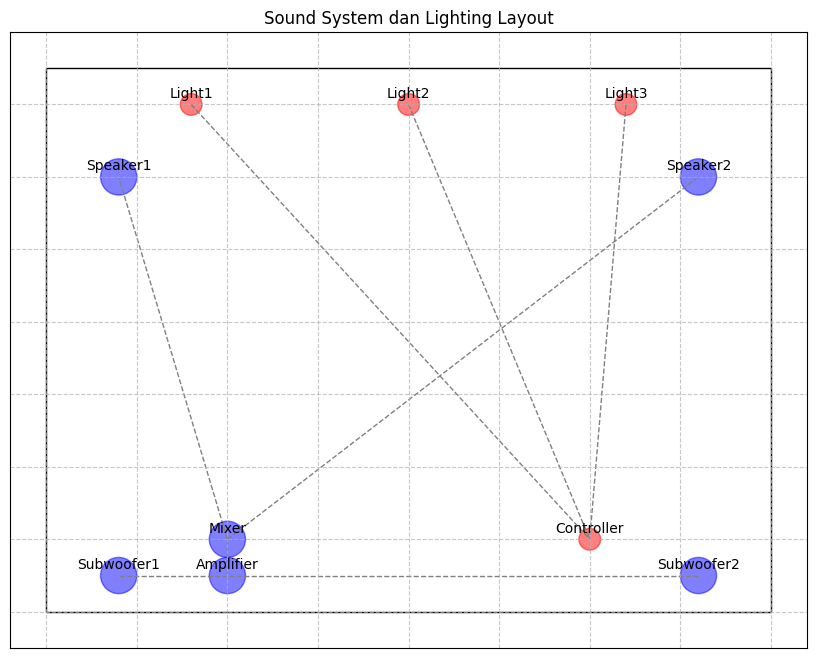

Total panjang kabel yang dibutuhkan: 85.16 meter


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
import networkx as nx

def create_venue_layout(width=20, height=15):
    # Inisialisasi plot
    fig, ax = plt.subplots(figsize=(12, 8))

    # Gambar ruangan
    room = Rectangle((0, 0), width, height, fill=False, color='black')
    ax.add_patch(room)

    # Posisi peralatan sound system
    sound_equipment = {
        'Mixer': (5, 2),
        'Speaker1': (2, 12),
        'Speaker2': (18, 12),
        'Subwoofer1': (2, 1),
        'Subwoofer2': (18, 1),
        'Amplifier': (5, 1)
    }

    # Posisi lighting
    lighting = {
        'Light1': (4, 14),
        'Light2': (10, 14),
        'Light3': (16, 14),
        'Controller': (15, 2)
    }

    # Gambar peralatan sound system
    for name, pos in sound_equipment.items():
        circle = Circle(pos, 0.5, color='blue', fill=True, alpha=0.5)
        ax.add_patch(circle)
        ax.annotate(name, (pos[0], pos[1]), xytext=(0, 5),
                   textcoords='offset points', ha='center')

    # Gambar lighting
    for name, pos in lighting.items():
        circle = Circle(pos, 0.3, color='red', fill=True, alpha=0.5)
        ax.add_patch(circle)
        ax.annotate(name, (pos[0], pos[1]), xytext=(0, 5),
                   textcoords='offset points', ha='center')

    # Buat graph untuk jalur kabel
    G = nx.Graph()

    # Tambah nodes
    for name, pos in {**sound_equipment, **lighting}.items():
        G.add_node(name, pos=pos)

    # Tambah edges untuk sound system
    G.add_edge('Mixer', 'Speaker1')
    G.add_edge('Mixer', 'Speaker2')
    G.add_edge('Mixer', 'Amplifier')
    G.add_edge('Amplifier', 'Subwoofer1')
    G.add_edge('Amplifier', 'Subwoofer2')

    # Tambah edges untuk lighting
    G.add_edge('Controller', 'Light1')
    G.add_edge('Controller', 'Light2')
    G.add_edge('Controller', 'Light3')

    # Gambar jalur kabel
    pos = nx.get_node_attributes(G, 'pos')
    nx.draw_networkx_edges(G, pos, edge_color='gray', style='dashed')

    # Set axis properties
    ax.set_xlim(-1, width+1)
    ax.set_ylim(-1, height+1)
    ax.set_aspect('equal')
    ax.grid(True, linestyle='--', alpha=0.7)

    plt.title('Sound System dan Lighting Layout')
    plt.show()

    return G

# Generate layout dan hitung total panjang kabel
G = create_venue_layout()

# Hitung total panjang kabel
total_length = 0
pos = nx.get_node_attributes(G, 'pos')
for edge in G.edges():
    point1 = pos[edge[0]]
    point2 = pos[edge[1]]
    length = np.sqrt((point2[0]-point1[0])**2 + (point2[1]-point1[1])**2)
    total_length += length

print(f"Total panjang kabel yang dibutuhkan: {total_length:.2f} meter")

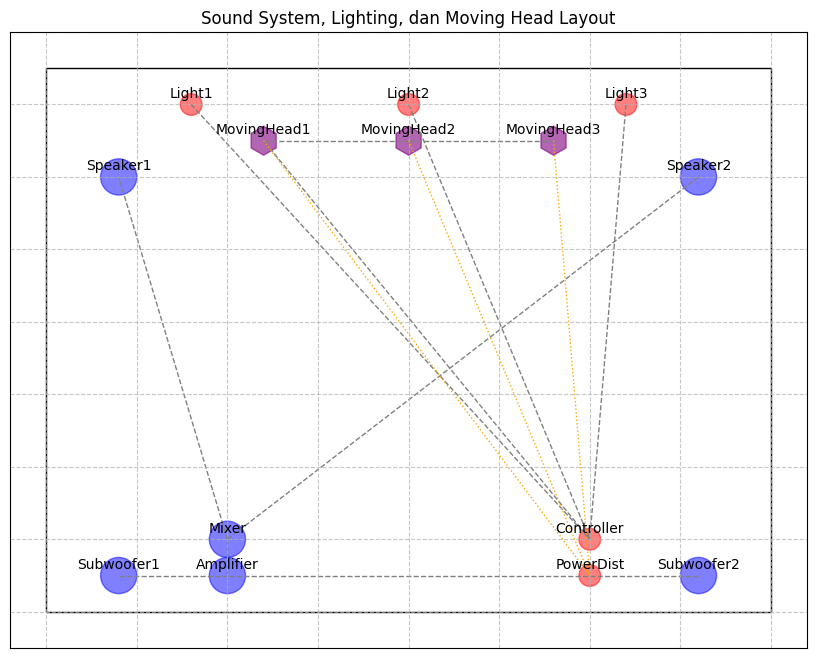

Total panjang kabel sinyal (DMX/Audio): 107.37 meter
Total panjang kabel power: 40.04 meter
Total keseluruhan kabel: 147.42 meter


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle, RegularPolygon
import networkx as nx

def create_venue_layout(width=20, height=15):
    fig, ax = plt.subplots(figsize=(12, 8))

    room = Rectangle((0, 0), width, height, fill=False, color='black')
    ax.add_patch(room)

    sound_equipment = {
        'Mixer': (5, 2),
        'Speaker1': (2, 12),
        'Speaker2': (18, 12),
        'Subwoofer1': (2, 1),
        'Subwoofer2': (18, 1),
        'Amplifier': (5, 1)
    }

    lighting = {
        'Light1': (4, 14),
        'Light2': (10, 14),
        'Light3': (16, 14),
        'Controller': (15, 2),
        'MovingHead1': (6, 13),
        'MovingHead2': (10, 13),
        'MovingHead3': (14, 13),
        'PowerDist': (15, 1)  # Power distribution unit untuk moving head
    }

    # Gambar peralatan sound
    for name, pos in sound_equipment.items():
        circle = Circle(pos, 0.5, color='blue', fill=True, alpha=0.5)
        ax.add_patch(circle)
        ax.annotate(name, (pos[0], pos[1]), xytext=(0, 5),
                   textcoords='offset points', ha='center')

    # Gambar lighting
    for name, pos in lighting.items():
        if 'MovingHead' in name:
            # Gunakan hexagon untuk moving head
            hex = RegularPolygon(pos, numVertices=6, radius=0.4,
                               color='purple', fill=True, alpha=0.6)
            ax.add_patch(hex)
        else:
            circle = Circle(pos, 0.3, color='red', fill=True, alpha=0.5)
            ax.add_patch(circle)
        ax.annotate(name, (pos[0], pos[1]), xytext=(0, 5),
                   textcoords='offset points', ha='center')

    G = nx.Graph()

    for name, pos in {**sound_equipment, **lighting}.items():
        G.add_node(name, pos=pos)

    # Sound system connections
    G.add_edge('Mixer', 'Speaker1')
    G.add_edge('Mixer', 'Speaker2')
    G.add_edge('Mixer', 'Amplifier')
    G.add_edge('Amplifier', 'Subwoofer1')
    G.add_edge('Amplifier', 'Subwoofer2')

    # Lighting connections
    G.add_edge('Controller', 'Light1')
    G.add_edge('Controller', 'Light2')
    G.add_edge('Controller', 'Light3')

    # Moving head connections - DMX control
    G.add_edge('Controller', 'MovingHead1')
    G.add_edge('MovingHead1', 'MovingHead2')
    G.add_edge('MovingHead2', 'MovingHead3')

    # Moving head power connections
    G.add_edge('PowerDist', 'MovingHead1', color='orange')
    G.add_edge('PowerDist', 'MovingHead2', color='orange')
    G.add_edge('PowerDist', 'MovingHead3', color='orange')

    # Draw cables
    pos = nx.get_node_attributes(G, 'pos')

    # Draw DMX/audio cables
    normal_edges = [(u, v) for (u, v, d) in G.edges(data=True) if 'color' not in d]
    nx.draw_networkx_edges(G, pos, edgelist=normal_edges, edge_color='gray', style='dashed')

    # Draw power cables
    power_edges = [(u, v) for (u, v, d) in G.edges(data=True) if d.get('color') == 'orange']
    nx.draw_networkx_edges(G, pos, edgelist=power_edges, edge_color='orange', style='dotted')

    ax.set_xlim(-1, width+1)
    ax.set_ylim(-1, height+1)
    ax.set_aspect('equal')
    ax.grid(True, linestyle='--', alpha=0.7)

    plt.title('Sound System, Lighting, dan Moving Head Layout')
    plt.show()

    return G

# Generate layout dan hitung total panjang kabel
G = create_venue_layout()

# Hitung total panjang kabel berdasarkan tipe
total_signal = 0
total_power = 0
pos = nx.get_node_attributes(G, 'pos')

for u, v, data in G.edges(data=True):
    point1 = pos[u]
    point2 = pos[v]
    length = np.sqrt((point2[0]-point1[0])**2 + (point2[1]-point1[1])**2)

    if data.get('color') == 'orange':
        total_power += length
    else:
        total_signal += length

print(f"Total panjang kabel sinyal (DMX/Audio): {total_signal:.2f} meter")
print(f"Total panjang kabel power: {total_power:.2f} meter")
print(f"Total keseluruhan kabel: {total_signal + total_power:.2f} meter")